In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
plt.rc("font", family = "Malgun Gothic")
plt.rc('axes', unicode_minus = False)

df = pd.read_csv('subway_time.csv', encoding='cp949')

del df['사용월'], df['역ID'] #사용 월, 역 ID 제거

df = df.drop(0) #첫 번째 행 삭제

#column 이름 바꾸기
df.columns = ['호선명', '지하철역', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차','승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']

df.index = df["호선명"] +" "+ df["지하철역"] #호선명, 지하철역 index 만들기

del df['호선명'], df['지하철역'] #호선명, 지하철역 제거

df = df.astype(float) #실수형으로 저장

df

,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1호선 서울역,742.0,17.0,9080.0,6035.0,10910.0,32383.0,30876.0,80123.0,55416.0,166935.0,...,14988.0,10966.0,71.0,867.0,10.0,15.0,0.0,4.0,0.0,0.0
1호선 동묘앞,132.0,0.0,3178.0,861.0,3276.0,3663.0,5598.0,8477.0,7558.0,20648.0,...,1282.0,2811.0,6.0,1714.0,1.0,11.0,0.0,1.0,0.0,0.0
1호선 시청,30.0,0.0,1849.0,3661.0,2920.0,17380.0,5780.0,52752.0,7239.0,143481.0,...,7583.0,1714.0,25.0,133.0,0.0,0.0,0.0,1.0,0.0,0.0
1호선 종각,118.0,2.0,2993.0,3787.0,3477.0,22236.0,5244.0,90183.0,8042.0,202351.0,...,22100.0,2500.0,78.0,210.0,3.0,3.0,2.0,1.0,0.0,0.0
1호선 종로3가,229.0,14.0,3923.0,2939.0,3693.0,10771.0,4878.0,21341.0,6775.0,60913.0,...,13250.0,3508.0,90.0,656.0,10.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
우이신설선 북한산보국문,7.0,1.0,1669.0,588.0,5732.0,1953.0,17459.0,5075.0,21276.0,7894.0,...,1147.0,4526.0,5.0,11.0,4.0,8.0,0.0,0.0,0.0,0.0
우이신설선 정릉,1.0,0.0,1838.0,504.0,4446.0,1613.0,12235.0,3064.0,14344.0,5856.0,...,613.0,2392.0,1.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0
우이신설선 성신여대입구(돈암),1.0,0.0,719.0,348.0,1088.0,902.0,3159.0,3549.0,5030.0,7210.0,...,1657.0,1287.0,2.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0
우이신설선 보문,2.0,0.0,433.0,233.0,735.0,1039.0,1893.0,2561.0,3171.0,4674.0,...,407.0,813.0,4.0,16.0,2.0,2.0,0.0,0.0,0.0,0.0


원하는 호선 명과 역 이름을 입력하세요 : 1호선 서울역


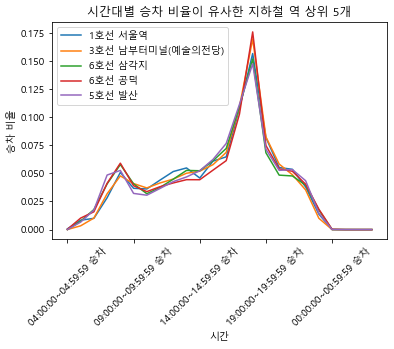

In [19]:
df_ride = df.copy() #데이터프레임 복제

del df_ride['하차'] #하차 제거

ride_sum = df_ride.sum(axis=1) #역 별 승차 인원의 합
df_ride  = df_ride.div(ride_sum, axis=0) #비율 계산

df_ride = df_ride.astype(float)

name = input("원하는 호선 명과 역 이름을 입력하세요 : ")

a = df_ride.index.str.contains(name) 
df2 = df_ride[a]

x = df_ride.sub(df2.iloc[0], axis = 1) #입력 받은 역의 비율에서 다른 역의 비율 빼기

y = np.power(x,2) #뺀 값의 제곱
z = y.sum(axis=1).sort_values() #y값(제곱의 값)의 합 

i = z.sort_values().index[:5] #상위 5개의 역 추출

df_ride.loc[i].T.plot() #꺾은선 그래프 그리기

plt.xlabel("시간") #x 라벨 이름
plt.ylabel("승차 비율") #y 라벨 이름
plt.title("시간대별 승차 비율이 유사한 지하철 역 상위 5개") #그래프 title

#그래프 x축 눈금 및 레이블 값
plt.xticks(np.arange(0, 25, 5), labels=['04:00:00~04:59:59 승차','09:00:00~09:59:59 승차','14:00:00~14:59:59 승차','19:00:00~19:59:59 승차','00:00:00~00:59:59 승차'])
plt.xticks(rotation = 45) #x축 눈금 레이블 값 회전

plt.show()

원하는 호선 명과 역 이름을 입력하세요 : 1호선 서울역


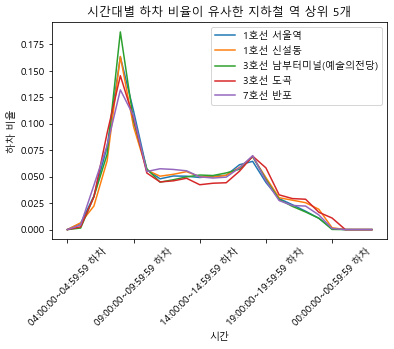

In [20]:
df_off = df.copy()

del df_off['승차']

off_sum = df_off.sum(axis=1)
df_off  = df_off.div(off_sum, axis=0)

df_off.fillna(0, inplace = True) #결측치 값 0으로 변경
df_off.isnull().values.any() #결측치 유무 확인

df_off = df_off.astype(float)

name = input("원하는 호선 명과 역 이름을 입력하세요 : ")

a = df_off.index.str.contains(name)       

df2 = df_off[a]

x = df_off.sub(df2.iloc[0], axis = 1)

y = np.power(x,2)
z = y.sum(axis=1).sort_values()

i = z.sort_values().index[:5]

df_off.loc[i].T.plot()

plt.xlabel("시간") 
plt.ylabel("하차 비율") 
plt.title("시간대별 하차 비율이 유사한 지하철 역 상위 5개")

plt.xticks(np.arange(0, 25, 5), labels=['04:00:00~04:59:59 하차','09:00:00~09:59:59 하차','14:00:00~14:59:59 하차','19:00:00~19:59:59 하차','00:00:00~00:59:59 하차'])
plt.xticks(rotation = 45)

plt.show()



원하는 역의 호선 명과 역 이름을 입력해주세요: 1호선 서울역


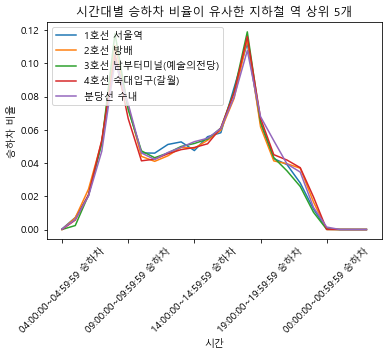

In [21]:
df_ride_num = df.copy()
del df_ride_num['하차']
#승차 데이터 column 이름 변경
df_ride_num.columns = ['승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차']

df_off_num = df.copy()
del df_off_num['승차']
#하차 데이터 column 이름 변경
df_off_num.columns = ['승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차', '승하차']

df_inoff = df_ride_num + df_off_num #승차, 하차 데이터 값 각각 더하기 => broadcasting

inoff_sum = df_inoff.sum(axis=1)
df_inoff = df_inoff.div(df_inoff.sum(axis=1), axis=0)

name = input("원하는 역의 호선 명과 역 이름을 입력해주세요: ") 
a = df_inoff.index.str.contains(name)
df2 = df_inoff[a]

x = df_inoff.sub(df2.iloc[0], axis = 1)
y = np.power(x,2)
z = y.sum(axis=1).sort_values()
i = z.sort_values().index[:5]

df_inoff.loc[i].T.plot()

plt.xlabel("시간")
plt.ylabel("승하차 비율")
plt.title("시간대별 승하차 비율이 유사한 지하철 역 상위 5개")

plt.xticks(np.arange(0, 25, 5), labels=['04:00:00~04:59:59 승하차','09:00:00~09:59:59 승하차','14:00:00~14:59:59 승하차','19:00:00~19:59:59 승하차','00:00:00~00:59:59 승하차'])
plt.xticks(rotation = 45)

plt.show()
